<a href="https://colab.research.google.com/github/thual/CLAT-PerodicHill/blob/main/periodicHills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 2/12/2021. LicenceCC BY-SA*
#Ondes internes émises par une colline périodique

Le train d'ondes internes stationnaires émises par une topographie sinusoïdale $h(x)=h_0\, \sin(k_s\,x)$ en présence d'un vent $V$ est ici modélisé par l'équation : 
$$ V^2\, {\partial^2 \over \partial x^2}\,\left({\partial^2  \over \partial x^2} + {\partial^2  \over \partial z^2} \right) w + N^2 \, {\partial^2 u \over \partial x^2} w = h(x) \, f(z)$$
où $N_b^2 = {g\over \Theta_r} \, {d \overline\Theta \over dz}$ est la fréquence de Brunt-Vaisalla et $f(z)$ une modélisation d'influence de la  topographie. 

On montre ([1]) que la solution complexe de cette équation est le champ $w(x,z) = \exp(i\,k_s \, x) \,g(z)$ avec
$$ g(z) = \underset{\epsilon \to 0}{\lim} \int_{\mathbb R} {\widehat f(k_z) \over -(V\,k_s+ i\, \epsilon)^2 +\Omega^2(k_s,k_z)} \, dk_z\;,$$

où $\widehat f$ est la transformée de Fourier de $f$ définie par la relation 
$$ f(z) = \int_{\mathbb R} \widehat f(k_z)   e^{-i\, k_z\, z}\, dk_z\;,$$
et $\Omega(k_x,k_z) = N_b\, k_x/\sqrt{k_x^2 + k_z^2}$ la relation de dispersion des ondes internes. La solution physique est obtenue en prenant la partie réelle de $u(x,z,t)$.
On modélise ici le forçage du relief par une gaussienne :
$$ fz) = \exp\left(- { z^2 \over 2\, \sigma^2}\right)\;.$$
La solution physique est alors obtenue en prenant la partie réelle de $w$.

[1] O. Thual, Des ondes et des fluides, Cépaduès-Éditions 2005, http://thual.perso.enseeiht.fr/otapm/odf-emiobs/index.htm


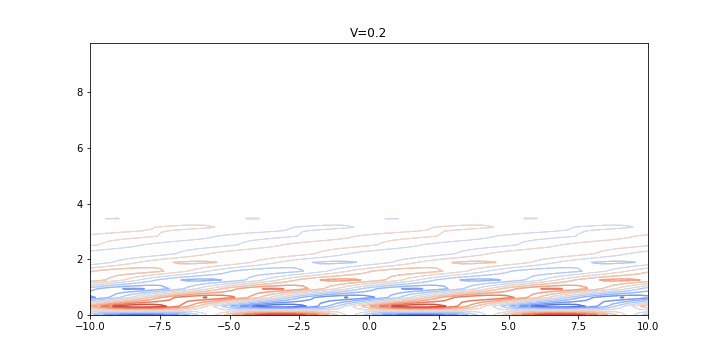

Exécutez cette première partie du code pour définir les fonctions ! 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

# Sous programmes 

def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def detail():
    # details of the computations
    V=.4*Nb/ks; eps=epsV*V  
    # parametres derives
    N=2*Nh; M=2*Mh; 
    kc=np.sqrt(Nb2/V**2-ks**2) 
    # coordonnees
    x=np.linspace(-Lx,Lx,N); z=np.linspace(0,Lz,M)
    X, Z = np.meshgrid(x,z)  
    # vecteurs d'ondes
    kz=np.fft.fftfreq(M)*M*kz0
    print("Nb2/V2-ks2=",Nb2/V**2-ks**2,"kmax2=",kz[Mh]**2,
          "kc=sqrt(Nb2/V2-ks2)=",kc)  
    # calcul de u(z)
    d=-(ks*V+1j*eps)**2+Nb2*ks**2/(ks**2+kz**2)
    f=np.exp(-z**2/(2*sig**2))
    fh=np.fft.fft(f)
    uh=fh/d
    u=np.fft.fft(uh)
    plt.plot(kz,np.real(uh),"green"); 
    plt.plot(kz,np.imag(uh),"red"); 
    plt.title("spectral"); plt.show()    
    plt.plot(z,np.real(u),"green"); 
    plt.plot(z,np.imag(u),"red"); 
    plt.title("physique"); plt.show()
    plt.plot(kz,np.real(d),"green"); 
    plt.plot(kz,np.imag(d),"red"); 
    plt.title("d"); 
    plt.plot(kz,d*0,"blue",[kc,kc],[min(d),max(d)],"blue");
    plt.show()

def animate(n):
    V=.1*n; 
    eps=epsV*V
    kc=np.sqrt(Nb2/V**2-ks**2)
    # calcul de u(z)
    d=-(ks*V+1j*eps)**2+Nb2*ks**2/(ks**2+kz**2)
    uh=fh/d
    u=np.fft.fft(uh)
    # visu ondes
    G,U=np.meshgrid(g,u)
    W=U*G
    WR=np.real(W)
    Wmax=np.max(WR)
    lev=np.linspace(-Wmax,Wmax,12)
    Mhh=int(Mh/2)
    #for animation
    ax.clear()
    ax.set_title("V="+zfi(round(V,2),3))
    ax.contour(X[0:Mhh,:],Z[0:Mhh,:],WR[0:Mhh,:],levels=lev,cmap=cm.coolwarm)

Les paramètres suivants de la simulation peuvent être modifiés : 

* Nh : $N/2$, la moitié du nombre de points de grille en $x$
* Mh : $M/2$, la moitié du nombre de points de grille en $z$
* epsV : rapport $\epsilon/V$
* (Lx, Lz) : taille du domaine
* ks : nombre d'onde $k_s$
* Nb : $N_b$, Fréquence de Brunt Vaissala
* sig : écart-type $\sigma$ de la gaussienne $f$

Exécutez le programme ci-dessous et placez-vous en bas de la page pour voir l'animation !

In [ ]:
######################################
# Main Program 


# parametres ajustable
Nh=32; Mh=64; epsV=.1;
Lz=40; kz0=2*np.pi/Lz; 
Lx=10; kx0=2*np.pi/Lx; ks=kx0;
Nb=1; Nb2=Nb**2; sig=Lz/10
titre="Periodic hill"

# parametres derives
N=2*Nh; M=2*Mh; 

# Detail des calculs
detail()

# coordonnees
x=np.linspace(-Lx,Lx,N); z=np.linspace(0,Lz,M)
X, Z = np.meshgrid(x,z)

# vecteurs d'ondes
kz=np.fft.fftfreq(M)*M*kz0

# relief
f=np.exp(-z**2/(2*sig**2))
fh=np.fft.fft(f)
g=np.exp(1j*ks*x)

# animation
fig, ax = plt.subplots(figsize=(10,5))
ani=animation.FuncAnimation(fig,animate,frames=range(2,10),interval=500)
ani.save(titre+'.gif', writer='pillow')

# Visualisation animée de la simulation 
print("\nSimulation pour visualiser l'animation")   
plt.close() 
plt.rc('animation', html='jshtml')
ani